Background

Research Question

Methods

Result

Discussion


contribution

references

In [1]:
#from ensemble import RegressionEnsemble, MixedRegressionEnsemble, BootstrapEnsemble, ShuffleEnsemble
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

np.random.seed(420)

# arrogant ignorance: A way to measure it

# smug predictors: How to bring them down

# identifying shitheads: Why it is important and how to do it

# Charlatans, dilletants, quacks - how to identify them Or my model keeps talking bullshit

One of the most fundamental questions of rational behaviour is whether it is more beneficial to \textit{take an action now} or \textit{gather  more information in order to better assess the situation}.
%[ make a better decision/about the situation/ to better assess the situation]. 

On the one hand, gathering more data often comes at a price, like delayed or even diminished rewards due to bad timing or additional cost for obtaining larger data sets; on the other hand, making a decision based on insufficient knowledge could occasionally lead to disastrous outcomes.\footnote{More data, for example, could mean testing more subjects in a scientific study; decisions without awareness could lead to being eaten by a camouflaged predator}. This is generally referred to as the dilemma of choosing between \textit{exploration vs exploitation}.\\

An agent\footnote{Please note: This work will focus on uncertainty in predictive models. It is assumed that each agent needs a (possibly mental) model of the world in order to make decisions. Thus in the following the distinction between agent and model is greyed out; with the agent being seen as the 'carrier' of the model and the model being the 'decision process' of the agent. And agent might, for example, be a scientist trying to decide the support for a theory utilising novel data science tools. Predictive uncertainty is indeed one of the ways of transforming a \textit{model} into an \textit{agent}: As e.g. \cite{Eckles2014} show, a method called \textit{Thompson Sampling} can for example be used to transform a simple predictive model into an agent that can make decisions without human intervention, as long as predictive uncertainty estimates can be obtained.}, therefore, should be aware of the likelihood of her predictions being correct; that way she can weigh benefits of instant action against the risk of making a wrong decision with the current best knowledge. In formal settings, this likelihood is often captured in the concept of \textit{uncertainty}. \\






\footnote{https://english.stackexchange.com/questions/288013/what-is-a-word-or-phrase-for-someone-who-professes-to-know-something-but-actuall}

## What is predictive uncertainty (Aleatoric and Epistemic Uncertainty)

[Predictive Uncertainty Estimation of
Hydrological Multi-Model Ensembles Using
Pair-Copula Construction] defines predictive uncertainty as follows:  'Predictive uncertainty (PU) is defined as the probability of occurrence of an observed variable of interest, conditional on all available information'. In other words, PU refers to the spread a predicted value is likely to exhibit given a model.
Classically, two kinds/sources of uncertainty have been identified:

_Epistemic Uncertainty_, which arises from the model being uninformed or wrong and is successively often calles _model uncertainty_. As expected, this kind of uncertainty can theoretically be mended by obtaining more training data or changing the type of the model. (THIS IS WHAT THOMPSON SAMPLING IS ABOUT! WHERE DO WE FIND MORE DATA!)

_Aleatoric Uncertainty_, which arises from intrinsic uncertainty in the dataset. The reasons for this might be manifold, ranging from measurement errors to unobserved variables (that might otherwise be able to explain the spread better)\footnote{the philosophical discussion of whether an unobserved variable is in essence the reason for every aleatoric uncertainty, as could be argued by philosophical determinists is omitted for brevity}. A good example are two datapoints with close X values that differn significantly in y value - it is clear that a model will likely not be able to predict a value in between the two well. \footnote{this could, however, be alleviated by finding a new dimension of X that explains the difference between the two. Imagine two angler fish that are of the same age but vastly different size. While this might seem confusing, realising that male specimen are way smaller than their female counterparts gives the model a variable to distinguish the two by.}

There is a third reason for predictive uncertainty, which is described for example in [Predictive Uncertainty Estimation via Prior Networks] and [DATASET SHIFT IN MACHINE LEARNING]: _Distributional uncertainty_, also referred to as _shift_. This uncertainty stems from the fact that by necessity in most cases the training and test datasets will contain slightly different examples and therefore must be considered from two different distributions. Depending on the task at hand and details of the applications, this might be a big or small influence on the predictie uncertainty.



### WHY DO I SAY ALL OF THIS?

## What are we looking for?

Essentially a score that gives us an answer to the question 'is my model confident in situations where it's error tends to be low and uncertain when it's error is likely to be high?'. That would show us, how much we can trust the prediction it gives us - it this measure is unsatisfactory, we should consider switching the model (or possibly ensembling it with other models that have other strengths and weaknesses [cite]), gathering more data or generally reconsidering our approach (or just be really, really careful when making a decision).


## What scores could be considered?

Uncertainty Calibration

Out of Distribution

NLPD

CoBEAU


let us now look at the measures separately



## What does Uncertainty Callibration say?

"Calibration refers to the statistical consistency between the distributional forecasts and the observations and is a joint property of the predic- tions and the events that materialize" [Probabilistic forecasts, calibration and sharpness
Tilmann]



Calibration is a concept originally assigned to probabilistic predictions - an agent is well calibrated if her predicted probabilities are reflected in the real world, i.e. if she predicts that over the course of her life she will like 50\% of the people she meets and she actually likes a number close to that, she is considered well calibrated.\footnote{One thing to note is that calibration is \textit{orthogonal} to precision -  an agent can be well calibrated but inaccurate and vice versa. Imagine e.g. the aforementioned agent. She can be right about liking about half the people she meets and thus perfectly calibrated - but every single prediction about who she is going to like can be wrong nonetheless}. 


This concept can be extended towards uncertainty intervals: If an agent expects a certain outcome to be in a specific interval of confidence around the prediction, and if the number of times the value can be found in this interval is indeed the confidence assigned to the interval, we can assume the agent to be well calibrated in it's confidence.
\cite{Dawid1982} gives a good explanation as well as some context as to translate the concept into the Bayesian framework, while e.g. \cite{lakshminarayanan2016simple} use the measure in practice.


## What does Out of Distribution say?


\paragraph{Out-of-distribution, aka does my agent know what she does not know}
The idea behind testing on out-of-distribution samples is that an agent should not be very certain about things it hasn't encountered any data on yet. Imagine a classifier trained to recognise images of dog breeds suddenly being presented with the image of a camel - we expect the classifier to be really uncertain about it's decision that it's seeing e.g. a very, very large pug.\\ 
Out-of-distribution samples are therefore data points that stem from different (although usually similar) distributions than the ones the model has been trained on, and thus we expect the model to perform somewhat poorer on them. However, we can also use those examples to estimate how well the model's uncertainty reacts to things it definitely cannot know. In the best case, our model would react by providing us with high uncertainty in out-of-distribution cases, likely accompanied by a large error.\\
This measure has seen wide spread use in e.g. deep learning, see \cite{bengio2011deep} as well as \cite{Hendrycks2016} for applications; it has also been used by \cite{Gal2015} and \cite{lakshminarayanan2016simple} to evaluate the uncertainty of their models. 


In regression, this measure is best approximated by giving the model far out values to predict and observe it's uncertainty behaviour at this point.


## Does it answer the question?

Somewhat - Out of Distribution Samples answer part of the question we are looking to answer: If the predictive uncertainty of the out of distribution sample is high, we can at least say that our model tends to give realistic results when confronted with values it has little information about. 

However, this is not enough to answer the question in a positive situation: Does the model also exhibit low uncertainty in situations where it is likely to be right? 



## NLPD
(MLPD) Comparison of Bayesian predictive methods for model selection

### Formula

One of the more interesting scores we used is the 'average Negative Log Predictive Density', or NLPD for short. It is used in 
Quiñonero-Candela, J., Rasmussen, C. E., Sinz, F., Bousquet, O., & Schölkopf, B. (n.d.) to assess the quality of uncertainty of different models. 
In a gist, in the gaussian case, it's an average measure of how closely the predictive uncertainty matches the error, with a logarithmic penalty term for uncertainties.
$$ NLPD_i =  1/2\frac{(\hat{y_i}- y_i)^2}{\sigma_i} + log(\sigma_i) (+C) $$ where $\sigma_i = \sqrt{\frac{\sum_{i=1}^N (\hat{y_i} - y_i)^2}{N-1}}$ is a samples predictive uncertainty , $\hat{y_i} = \sum_{i=1}^N pred_i$ is the samples predictive mean with $pred_i$ being the ith ensemble members prediction and $y_i$ is the samples real target value. 

The NLPD for the whole vector is computed as follows:

$$L = -\frac{1}{n}\sum_i^n log(p( y_i = t_i |X_i )$$
Which is simply the negative average of the above, taken over the whole Dataset under the assumption of $y_i$ being normally distributed.

### Intuition
NLPD is characterised by two additive terms:   $\frac{(\hat{y_i}- y_i)^2}{\sigma_i}$ and $log(\sigma_i)$. The first term is a measure for _how closely the uncertainty of the model matches it's error_. This part scales linearly with the error, assuming the variance stays the same. Assuming the error is fixed and the variance changes, we get an approximately linear relationship where the variance is lower than the error and an approximaltely logarithmic relationship where the uncertainty is higher than the error. The first property comes from the negligible contribution of the second term (log(sigma)) compared to 1/v, with v<0; the second property comes from the negligible contribution of 1/v, v>0 compared to log(v). However, as we can see, the measure more heavily punishes overconfident models with a linear term, compared to a logarithmic term for under-confident models.


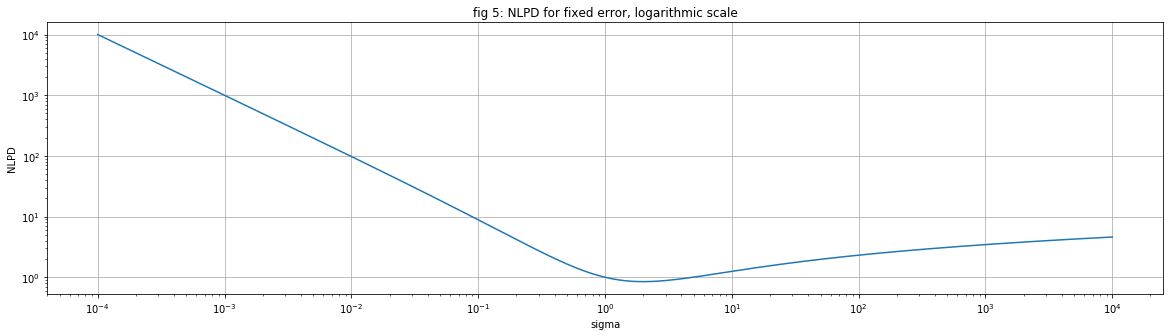

In [2]:
v = np.arange(0.0001,10000,.001)
e = np.arange(0,100,1000)
def nlpd_v(v):
    return 1/2 * np.log(v) + ((1)/v)
val_nlpd_v = nlpd_v(v)
plt.loglog(v,val_nlpd_v)
plt.xlabel('sigma')
plt.ylabel('NLPD')
plt.title('fig 5: NLPD for fixed error, logarithmic scale')
plt.grid(True)

Fig 5 displays the NLPD depending on $\sigma$ with a fixed value for $(\hat{y_i}- y_i)^2 = 1$. As we can see, it penalizes overconfident models (that display low uncertainty although they exhibit high error) more than underconfident (vice versa) ones. This opinion has its benefits and negative sides, but in general, it is an interesting measure of the quality of uncertainty.

### What it says

a NLPD score close to or above 0 indicates two things: The uncertainty of the model is in tune with the error and the uncertainty of the model is low (positive values for this score are possible if the numerical error is low as well as the uncertainty is below 1 - since in this case the log is negative and is not being balanced out by the quotient which is close to 1) . Indirectly this indicates that the error of the model itself has to be low (since this is the only way for $\sigma$ and the error to be in tune, which is necessary to keep the quotient value low, while also having a low $\sigma$ itself, which is necessary in order to obtain a low value for the logarithmic part of the equation. 

There are two sources of deviation from 0 in NLPD:
1. The model is not accurate ($\hat{y_i}- y_i)^2 >> 0$. This either results in a large quotient $(\hat{y_i}- y_i)^2/\sigma_i$ if $\sigma << (\hat{y_i}- y_i)^2$ or, if that quotient is low because the models predictive uncertainty is in tune with it's error ($\sigma \approx \hat{y_i}- y_i)^2$, OR in a large uncertainty (that might or might not be in tune with the error)

2. The model is accurate, but is underconfident ($\sigma >> \hat{y_i}- y_i)^2$). In this case the quotient is close to zero and the largest part of the score stems from the logarithmic part of the equation.



### What does convergence of NLPD say?


Assuming it converges towards 0: it means that the uncertainty matches the error and that the error goes towards 0. 




### is my model confident in situations where it knows the outcome and uncertain otherwise?

The answer of 'does the model know when its predictions are right or wrong' is answered by NLPD in a certain way. NLPD is high for models that have low predictive uncertainty with high error and vice versa. However, there are certain caveats to be aware of, such as NLPD being a conservative measure. More in depth analysis of it's properties will be done in the discussion part.

## What does a correlation between Error and Uncertainty express ecaxtly? 

### Formula
Is my model certain where it is correct and the other way round? 
More in detail: Pearson's Correlation Coefficient (following correlation) is computed by $$ r = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_i(x_i-\bar{x})^2}\sqrt{\sum_i(y_i-\bar{y})^2}}$$ Where $\bar{x_i}$ and $\bar{y}$ respectively denotes the mean of the variable and $x_i$ and $y_i$ denotes the ith entry in the dataset.\\
Essentially, the correlation between two variables tells us how co-related they are. 

### Intuition
IMPORTANT: Pearson's correlation is analogous to a normalised linear regression slope. (Note that the slope of a linear regression can be computed on-line\footnote{on a per-datapoint basis} with the formula y = ax + b where a = $a = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_i(x_i-\bar{x})^2}}$ and $b = \bar{y} - a*\bar{x}$ with the same nomeclature as above, and thus correlation is in essence a centralised linear regression that is normalised additionally by the standard deviation of the target variable.

### What it says
Correlation is characterised as a quotient between two [things]: The Covariance of X and y regularized by the product of the variances or x and y.



In essence, the correlation between the error and the predictive uncertainty a model produces shows how well _one could be used to predict the other, assuming a linear relationship_. This is 


### What does the convergence of CoBEAU say?

When CoBEAU converges towards 1, it means the model is aware of where it's predictions tend to contain errors.

When CoBEAU converges towards 0, it means the model is totally unaware of its predictions likelihood of producing errors.

When CoBEAU converges towards -1, it means that the model thinks it is performing well when it actually performs poorly and vice versa.

However, it does not indicate the SCALE of the uncertainty that is connected to the error - just that it is relatively more or less certain than for other samples. 


### is my model confident in situations where it knows the outcome and uncertain otherwise?

CoBEAU indeed indicates the answer to the question we are looking for. It tells us the relation between relative error and relative uncertainty. However, compared to NLPD, CoBEAU does not take into account the scale of the predictive uncertainty but only it's relative direction to it's own mean. This leads to CoBEAU theoretically giving a good score even when the predictive uncertainty is very low and does not reflect the uncertainty within the Data. More in the discussion.


### Can we use a walking correlation to estiate whether we have reached 'epistemic limits', or 'aleatoric uncertainty measures'? Then theoretically check the errors for normalcy and then decide if the current model is satisfactory or not//What does Convergence of this say?

Calculating the walking correlation of predictor and target 



https://stats.stackexchange.com/questions/23481/are-there-algorithms-for-computing-running-linear-or-logistic-regression-param

We all know the situation: A discussion starts, and one of the [mitmachern] is sure to be right, while other express uncertainty on the topic. In solcial situations, this can 

- Decision making often relies on convincing others
- In order to be convincing it often happens that the person who is the most sure takes the win. This is a big problem in science communication: Scientists always confer uncertainty and never commit to an absolute statement. Politicians do - this convinces masses
- we have a similar issue when relying on Machine Learning to give us an advice on how to proceed
- This is being used in reinforcement learning (example: Thompson sampling where the optimal solution is sampled from the probability of it being correct via some spread-function)
- What we need is a way to discern if an agent certain in situations in which he tends to be correct and uncertain in situations where he tends to be incorrect
- Aleatoric vs Epistemic uncertainty - it is impportant to be aware if the agent doesn't know things because he hasn't seen enough data or if the agent is too close minded - I.e. wrong model
- a few measures can be applied to this problem: Callibration (Frequentist, does the long term model uncertainty converge towards the data uncertainty), Out of Distribution Samples (Does the model report high uncertainty for situation in which it cannot be very knowledgeable, such as a cat species classifier asked to classify a camel)
- one particularly interesting measure is NLPD.
- one more interesting measure that to the best knowledge of the author hasn't been utilised is the correlation between error and uncertainty

Classification vs Regression

While this topic has been researched for classification a little better (see cites!), in regression there seems to be little interest in the topic of identifying shitheads

What uncertainty are we looking at - certainty that the predictive mean is somewhere close to the prediction OR Data uncertainty?

Aleatoric vs Epistemic:


Callibration

Out of sample

Now we're getting somewhere. This measure expresses the behaviour of an agent when he is confronted with unknown data. The classical case is an image classifier who gets presented with something he wasn't trained to recognize - a cat species classifier being shown a camel, for example.

NLPD
This measure is very interesting. 
Conservative (prefers underconfident over overconfident)
depends on uncertainty scaling


Correlation between uncertainty and error

This measure only takes into account LINEAR relations

THUS A CORRELATION IS ALREADY A MODEL SPECIFICATION?!? THAT IS NOMRALISED

## Methods

to compare NLPD and Correlation between error and uncertainty (EUC? CEU? CoBEAU (COrellation Between Error and Uncertainty), the measures have been applied to two Data Sets: A  one dimensional, linear Toy Dataset created via the Scikit Learn make_regression and the multi dimensional non linear Boston Housing Dataset from [Cite]. 

The first set has been chosen for it's simplicity as well as the fact that it is easy to visualise, aiding the [aufbau] of intuition for the difference between NLDP and CoBEAU, while the second Dataset has been chosen in order to analyse real-life performance of both measures.

We are going to look at the behaviour of both measures when confronted with each dataset and from there try to explain general and distinguishing properties of the measures.

Additionally, some visualisation and mathematical properties are analysed to gain insights into performance and optimal application of each of the statistics. 


### A quick review of ensembles for Uncertainty generation

The following section relies heavily on Ensembles to generate 'predictice uncertainty' to enable the comparisson of the different measures. 

Ensembles were chosen because they are one of the simplest and most adaptive ways of inducing predictive uncertainty, essentially enabling us to plug in any kind of model and (as long as it is able to sufficiently distinguish several instances of itself) obtain an estimate that is (in many cases) roughly equivalent to a sample from a predictive distribution as we would expect it from a fully specified distribution over parameters. 

However, little thought is given to the prior knowledge (which is chosen implicitly via things like model type, where applicable, initialisation values and similar variables) and the exact form of the posterior distribution. Due to the scope of this work, and because it serves as a wonderful example, the posterior distribution over target values is assumed to be gaussian, with a predictive mean $\hat{y_i}$ and a predictive uncertainty $\sigma_i$ that are computed from the list of outputs of the ensemble members.

The interested reader is pointed towards [Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles], [Bayesian Ensemble Learning] and especially [Uncertainty in Deep Learning] (as it is an amazing read with a great idea and well written) for more motivation and explanation behind using ensembles or ensemble-like structures to generate predictive uncertainty/








## plot both as functions of error and variance

Both measures depend on the vector of predictive uncertainty and the error produced by the model.

To gain an intuition of how each variable impacts the measurements, some plots:
First what we can see is that it is possible to plot NLPD on a fixed error and get 

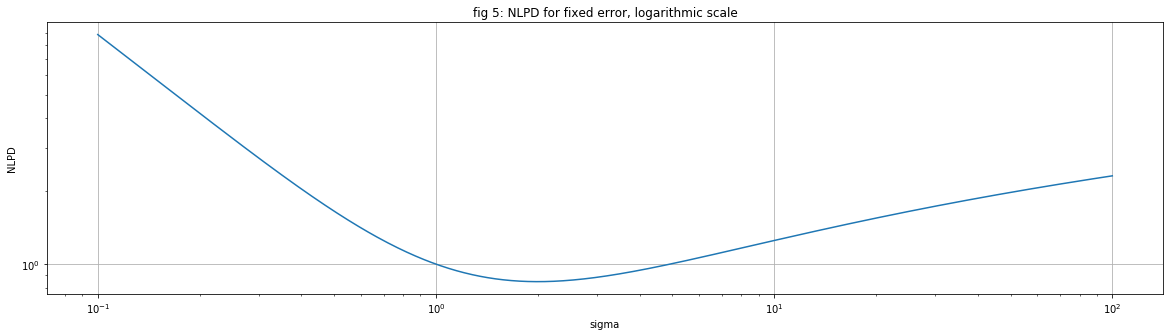

In [3]:
import numpy as np

v = np.arange(0.1,100,.01)

def nlpd_v(v):
    return 1/2 * np.log(v) + ((1)/v)


val_nlpd_v = nlpd_v(v)
plt.loglog(v,val_nlpd_v)
plt.xlabel('sigma')
plt.ylabel('NLPD')
plt.title('fig 5: NLPD for fixed error, logarithmic scale')
plt.grid(True)



In [4]:
def nlpd_e(e):
    return 1/2 * np.log(1) + ((e)/1)

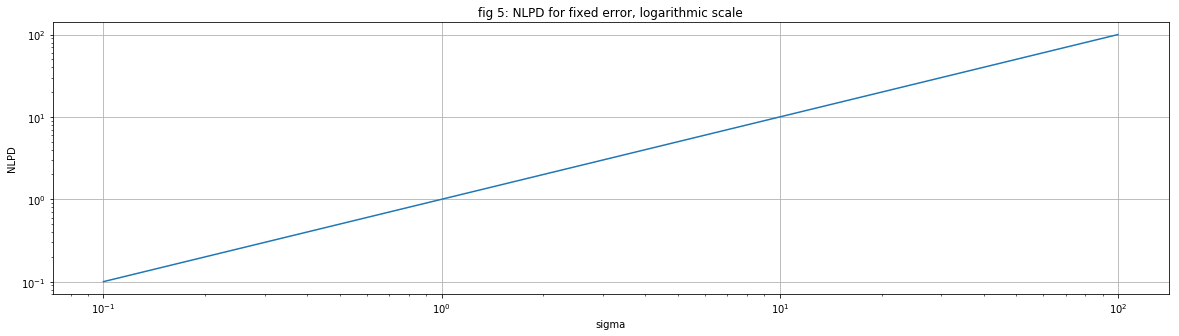

In [5]:
e = np.arange(0,100,.1)



val_nlpd_e = nlpd_e(e)
plt.loglog(e,val_nlpd_e)
plt.xlabel('sigma')
plt.ylabel('NLPD')
plt.title('fig 5: NLPD for fixed error, logarithmic scale')
plt.grid(True)


# What models to use
Ensemble mixed models

Ensemble Bootstrap

Ensemble Forest (as bad example)

Gaussian Process (If possible)

Direct estimation of data noise (does that make sense)

# Discussion

## Is my model aware of it's shortcomings

Yes, those measures are quire effective at finding out if a model generates valud predictive uncertainty.

They are SOMEWHAT similar, both being normalised at least by one kind of standard deviation, one being computed from the covariance of the two variables while the other is being computed by the error; 

## Differences

### opinionated
NLPD is opinionated

### data scale is important!
NLPD depends on the scale of the data :/

### penalizes 0 uncertainty infinitely
NLPD penalizes 0 uncertainty with infinity. As [Evaluating Predictive Uncertainty Challenge] mentions, this might be seen as too harsh; however, given that a properly bayesian agent should never assign perfect certainty (which corresponds to the degenerate gaussian in this case) to anything. In out example, in order to conserve numerical stability, a small minimal value was assigned to sigma.

### implicit modelling of callibration
NLPD implicitly models the callibration of the uncertainty estimates of the model locally. While it still holds true that a model can be well calibrated without giving good NLPD scores (as callibration does not factorize locality of the predictive uncertainty - a well calibrated model can exhibit uncertainty in the _wrong places_, a good NLPD score implicitly indicates good callibration (since it is impossible to get a NLPD score close to 0 for a model who's error (Which is used to compute the noise of the data) systematically deviates from its predictive uncertainty). 

### dependency on scale of error
NLPD depends on the size of the error - thus it will always penalize models that exhibit _epistemic uncertainty_ - uncertainty in the face of a large error will be penalized less than overconfidence but it will nonetheless be penalized.

CoBEAU generally only cares of the DIRECTION of the error - not it's scale

### dependency on scale of Uncerainty

NLPD depends heavily on the scale of the uncertainty. 

CoBEAU does not depend on the scale of the uncertainty - only it's direction

## How do they realte to each other

If NLPD is low, meaning that error and uncertainty are well aligned (and both are relatively low), we can assume that the CoBEAU score is close to 1, since each error is accompanied by a similar value of predictive uncertainty, which guarantees that they correlate to a certain extend.

However, a CoBEAU score close to 1 does not necessarily warrant a low NLPD - it is conceivable that either the uncertainty is badly scaled or the error is high, which would not interfere with correlation between uncertainty and error but would lead to a high NLPD score. In this case, we can deduce that our model is well attuned in that it is aware of it's error (uncertainty is relatively high where the error is relatively high), but it is either over or under confident. 

Overconfident: In this case, the model reports uncertainty that is generally too low. Several possible causes can be identified

Underconfident

### quotient of CoBEAU and NLPD

If the NLPD is high and CoBEAU is close to 1, we can assume that the model is generally well attuned with regards to predictive uncertainty and error - however, it is likely that the scaling of the predictive uncertainty is suboptimal. This can have several reasons: a) bad computation of the uncertainty. This could e.g. happen in a situation where an ensemble of models is being used. it would point towards either too much correlation in the ensemble members (leading to a degenerate ditribution/ distribution that is computed from too similar samples) OR b) the influence of a badly performant model; which would lead to a large discrepancy between predictions (take the extreme case of a linear regression being contained in an ensemble for a highly non-linear dataset, see Figure [X]).


In [96]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(9 * rng.rand(150, 1), axis=0)
y =  np.sin(X).ravel()*10 + np.random.normal(0,1,size=X.shape[0])
#y[::5] += 3 * (0.5 - rng.rand(16))






# Fit regression model
forest_regression = ensemble.RegressionEnsemble()
forest_regression.fit(X, y)

# Predict
X_test = np.arange(-5.0, 15, 0.01)[:, np.newaxis] 
y_forest,std_forest = forest_regression.predict(X_test,std=True)



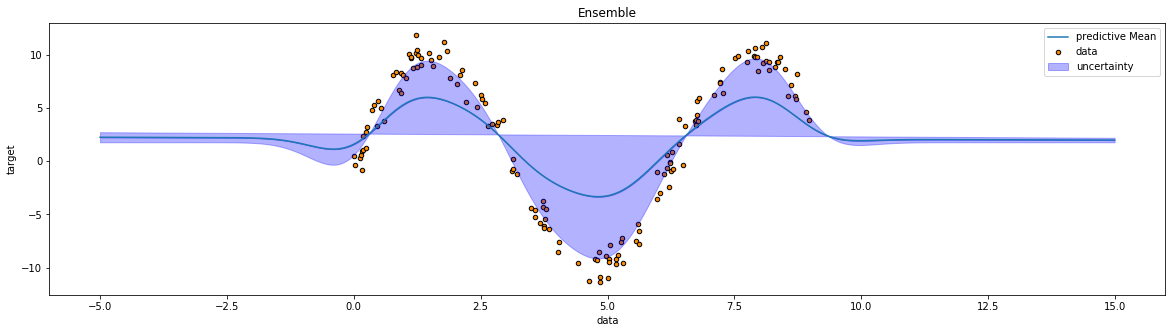

In [117]:
mixed_ensemble_2 = ensemble.MixedRegressionEnsemble(models = [#DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            #KNeighborsRegressor(),
                                                            #MLPRegressor(max_iter=1000),
                                                           SVR()
                                                             ])
mixed_regression = mixed_ensemble_2#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_ensemble_2.predict(X_test,std=True)

mixed_ensemble_2.scatterplot(X_test,X=X,y=y)

In [118]:
mixed_ensemble_2.self_evaluate(X,y)

{'NLPD': -3.30222992203846,
 'correlation between error and variance': 0.8301522330284539,
 'coverage probability': 0.3333333333333333,
 'rsme': 3.635767684137233}

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


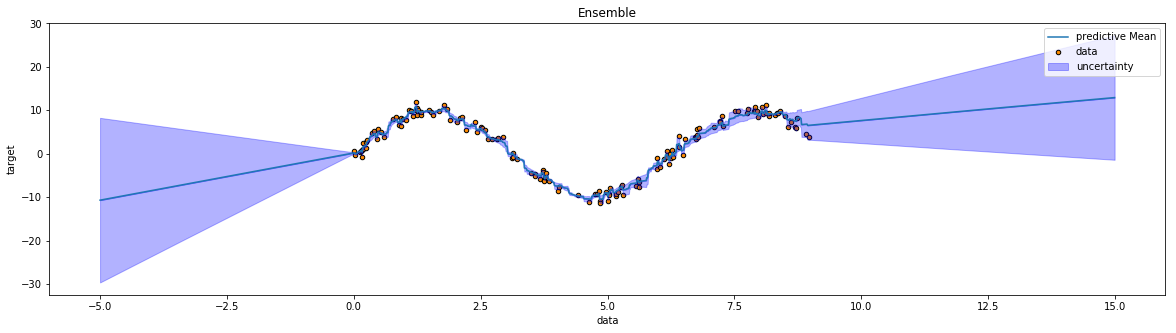

In [99]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=2500),
                                                           #SVR(),
                                                           RandomForestRegressor()])
mixed_regression = mixed_ensemble#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_regression.predict(X_test,std=True)

mixed_ensemble.scatterplot(X_test,X=X,y=y)

In [100]:
mixed_ensemble.self_evaluate(X,y)

{'NLPD': 0.01830847887229114,
 'correlation between error and variance': 0.8184655932750181,
 'coverage probability': 0.54,
 'rsme': 0.7219395959425775}

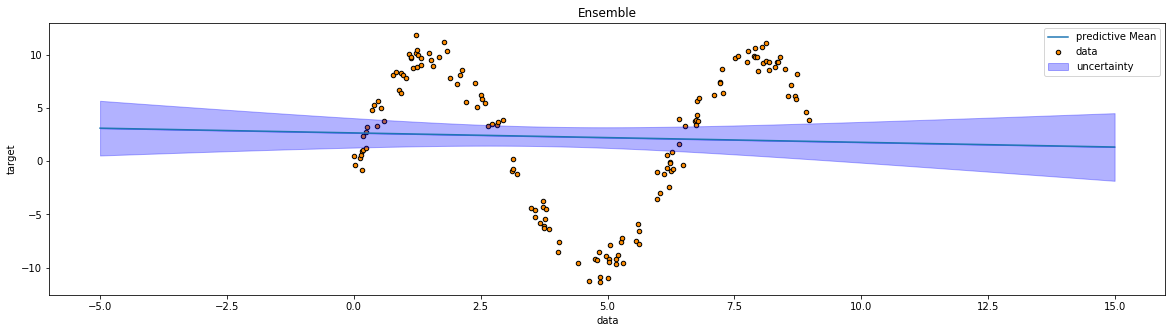

In [101]:
bootstrap_linear = ensemble.BootstrapEnsemble(model_type=LinearRegression ,num_models=30)
                                 
bootstrap_regression = bootstrap_linear#DecisionTreeRegressor(max_depth=5)
bootstrap_regression.fit(X, y)
y_mixed,std_mixed = bootstrap_regression.predict(X_test,std=True)

bootstrap_regression.scatterplot(X_test,X=X,y=y)

In [102]:
bootstrap_regression.self_evaluate(X,y)

{'NLPD': -20.734814058997255,
 'correlation between error and variance': -0.31490384122260257,
 'coverage probability': 0.04666666666666667,
 'rsme': 6.680692769612786}


## When to use each score
The choice when to use which score comes down to a couple of decisions. 

NLPD is very opninionated when it comes to over- vs undercondifrnt models. It also depends strongly on the scale of the predictive uncertainty.

CoBEAU is not opinionated, it only reports co-occuring deviation from the mean of both error and uncertainty

### NLPD
Opinionated: prefers underconfident models over overconfident ones


### Practical Example: Thompson Sampling

One of the more intriguing applications of predictive uncertainty is in the domain of reinforcement learning, more specifically in the realm of Multi-Armed-Bandit problems. In these situations\footnote{Named after the slot machines usually seen in casinos or similar establishments}, the agent has to choose between several possible choices (the _arms_) that compete for a limited amount of resources while optimising her expected reward. The problem arises from the fact that the coices are not thoroughly explored and thus the agent has to make a decision between _exploration and exploitation_ at each step [cite Bandit problems]. Thompson sampling, which in general is the idea of playing each arm according to its probability of being the optimal choice, has been proven to be within optimal bounds of regret\footnote{briefly: A measure of 'how much better I could have performed had I known which arm is the optimal arm'} in [Analysis of Thompson Sampling for the Multi-armed Bandit Problem]. \\
In practice, Thompson sampling\footnote{The algorithm can range from very simple bernoulli distrbutions to any kind of complex model that offers a distribution to be samples from through some (in the authors opinion) very smart manipulations of the vector of predicting variables.} relies on being able to sample from a distribution of possible outcomes for each arm (where the draws from the distributions are compared to factor in the probability of being optimal).\\
[put in definition from Wikipedia that shows dependence on posterior distribution].
Obviously, the Thompson Sample depends heavily on the availability of a model that gives predictions that converge towards being 'aware of their own uncertainty', since this is where it facilitates exploration vs exploitation.
 
is a problem in which a fixed limited set of resources must be allocated between competing (alternative) choices in a way that maximizes their expected gain, when each choice's properties are only partially known at the time of allocation, and may become better understood as time passes or by allocating resources to the choice.

## Combination of CoBEAU and NLDP

What does it say if they are pointing in the same direction?

What does it say if they are pointing in different directions?

